In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import ipyplot

# Functions

In [ ]:
def probs(n=0, nthresh=500):
    '''
    in this example, the probability of clicking each ad changes with time
    n is the counter/round for when the ad is being shown
    preferences change by a small amount epsilon
    '''
    #parameter
    eps = 0.1
    
    #baseline probabilities of clicking ads
    adprobs = [0.01, 0.015, 0.25, 0.18, 0.05]
    
    if (n> nthresh):
        adprobs = [0.01, 0.015, 0.1, 0.28, 0.05]
    
    return adprobs

print (probs(0))
probs(1000)


[0.01, 0.015, 0.25, 0.18, 0.05]


[0.01, 0.015, 0.1, 0.28, 0.05]

In [ ]:
def computeucb(shown, clicked):
    '''
    function to compute upper confidence bound
    UCB calculation from: 
    https://analyticsindiamag.com/reinforcement-learning-the-concept-behind-ucb-explained-with-code/
    '''
    #no of ads shown
    nads = len(shown)
    
    #mean and sd of clicks
    mean = np.zeros(nads)
    sd = np.zeros(nads)
    
    #no of times ads are shown
    nrounds = np.sum(shown)
    
    for i in range(nads):
        mean[i] = round(clicked[i]/shown[i], 3)
        
        # formula for delta and upper confidence bound from 
        #https://analyticsindiamag.com/reinforcement-learning-the-concept-behind-ucb-explained-with-code/
        sd[i] = round (np.sqrt(1.5 * np.log(nrounds+1)/ shown[i]), 3)
        
    ucb = mean + sd
    
    return (ucb)

In [ ]:
def dynamiclearning(nrounds):
    '''
    show ads and learn from changing click through rates
    '''
    #parameters
    
    #1. no of ads to be shown
    nads = 5 #if you change this, change the array size in probs function
    print ('no of ads for testing are {}'.format(nads))
    
    adsperday = 1000
    print ('no of ads shown per day are {}'.format(adsperday))
    
    #2. exploration threshold
    thresh = 0.2  #20% exploration and 80% exploitation
    print ('exploration happens for {}% of time'.format(thresh*100))
    #exploration 
    
    # part 1:
    # initialize arrays for counting
    shown = np.zeros(nads)
    print ('no of times each ad is shown is {}'.format(shown))
    clicked = np.zeros(nads)
    print ('no of times each ad is clicked is {}'.format(clicked))
    
    ucb = np.zeros(nads)
    print ('initial upper confidence bound array is {}'.format(ucb))
    
    # lists for prediction
    ucbl = []
    shownl = []
    clickedl = []
    actuall = []
    
    #loop over rounds / days
    for nr in range(nrounds):
        
        # loop over ads shown in a day
        for count in range(adsperday):
            #print (count)
            
            # part 2: choose exploration vs. exploitation
            # if exploration, choose random ad, else, choose best ad based on ucb
            if (np.random.random() < thresh):
                chosenad = np.random.randint(5)
            else:
                chosenad = np.argmax(ucb)
            
            #increment the ad shown count
            shown[chosenad] += 1
            
            #part 3:
            # for the ad chosen, get adprobs for nround and check if ad is clicked or not
            #update adshown, adclicked, ucb matrices
            adp = probs(nr)
            if (np.random.random() < adp[chosenad]):
                # ad is clicked
                clicked[chosenad] += 1
                #else, ad is not clicked
    
        # exiting inner lopp
        shownl.append(list(shown))
        clickedl.append(list(clicked))

        #part 4: compute ucb
        ucb = computeucb(shown, clicked)
        ucbl.append(list(ucb))
    
        act = probs(nr)
        actuall.append(act)        
        
    #cast them as dataframe for passing out of function
    showndf = pd.DataFrame(shownl)
    clickeddf = pd.DataFrame(clickedl)
    ucbdf = pd.DataFrame(ucbl)
    actualdf = pd.DataFrame(actuall)
    
    return (showndf, clickeddf, ucbdf, actualdf)

In [ ]:
ab, cd, ef, gh = dynamiclearning(5000)
#print (ab)

no of ads for testing are 5
no of ads shown per day are 1000
exploration happens for 20.0% of time
no of times each ad is shown is [0. 0. 0. 0. 0.]
no of times each ad is clicked is [0. 0. 0. 0. 0.]
initial upper confidence bound array is [0. 0. 0. 0. 0.]


In [ ]:
ab.head()

,0,1,2,3,4
0,839.0,44.0,36.0,42.0,39.0
1,894.0,65.0,897.0,73.0,71.0
2,930.0,123.0,934.0,899.0,114.0
3,978.0,160.0,962.0,932.0,968.0
4,1021.0,196.0,1814.0,968.0,1001.0


In [ ]:
#ab["sum"] = ab.sum(axis=1)
ab.head()

,0,1,2,3,4
0,839.0,44.0,36.0,42.0,39.0
1,894.0,65.0,897.0,73.0,71.0
2,930.0,123.0,934.0,899.0,114.0
3,978.0,160.0,962.0,932.0,968.0
4,1021.0,196.0,1814.0,968.0,1001.0


In [ ]:
ab["sum"] = ab.sum(axis=1)
ab.head()

,0,1,2,3,4,sum
0,839.0,44.0,36.0,42.0,39.0,1000.0
1,894.0,65.0,897.0,73.0,71.0,2000.0
2,930.0,123.0,934.0,899.0,114.0,3000.0
3,978.0,160.0,962.0,932.0,968.0,4000.0
4,1021.0,196.0,1814.0,968.0,1001.0,5000.0


In [ ]:
cd["sum"] = cd.sum(axis=1)
cd.head()

,0,1,2,3,4,sum
0,7.0,0.0,12.0,8.0,2.0,29.0
1,7.0,0.0,223.0,13.0,3.0,246.0
2,8.0,0.0,233.0,143.0,9.0,393.0
3,8.0,0.0,242.0,149.0,52.0,451.0
4,8.0,1.0,459.0,156.0,55.0,679.0


In [ ]:
ef.head()

,0,1,2,3,4
0,0.119,0.485,0.870,0.687,0.566
1,0.121,0.419,0.362,0.573,0.443
2,0.123,0.312,0.362,0.275,0.404
3,0.121,0.279,0.366,0.276,0.167
4,0.120,0.260,0.337,0.276,0.168


In [ ]:
gh.head()

,0,1,2,3,4
0,0.01,0.015,0.25,0.18,0.05
1,0.01,0.015,0.25,0.18,0.05
2,0.01,0.015,0.25,0.18,0.05
3,0.01,0.015,0.25,0.18,0.05
4,0.01,0.015,0.25,0.18,0.05


# Testing the outcomes

Text(0, 0.5, 'Overall CTR')

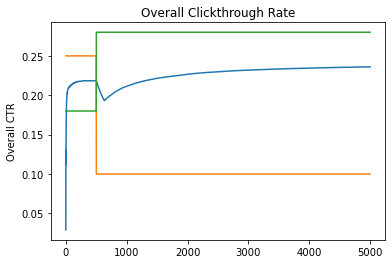

In [ ]:
#overall click through rate
plt.title('Overall Clickthrough Rate')
plt.plot(cd['sum']/ab['sum'])
plt.plot(gh[2])
plt.plot(gh[3])
plt.ylabel('Overall CTR')

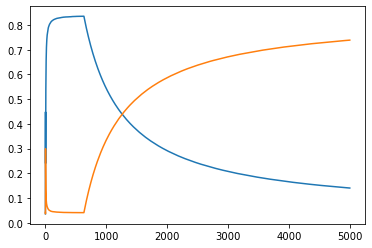

In [ ]:
# no of times most popular ad is picked up
plt.plot(ab[2]/ab["sum"])
plt.plot(ab[3]/ab["sum"])

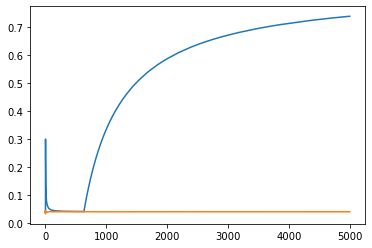

In [ ]:
# no of times other ads are picked up
plt.plot(ab[3]/ab["sum"])
plt.plot(ab[1]/ab["sum"])
#plt.plot(ab[0]/ab["sum"])

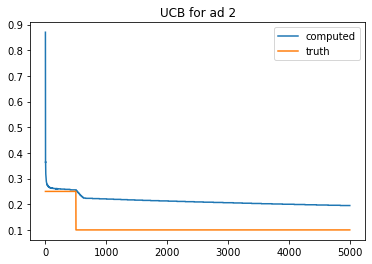

In [ ]:
plt.title('UCB for ad 2')
plt.plot(ef[2])
plt.plot(gh[2])
plt.legend(['computed', 'truth'])

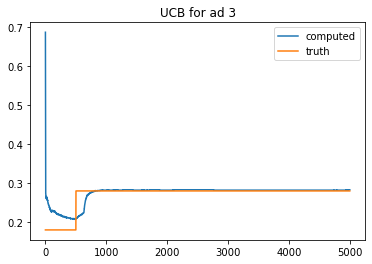

In [ ]:
plt.title('UCB for ad 3')
plt.plot(ef[3])
plt.plot(gh[3])
plt.legend(['computed', 'truth'])

In [ ]:
ab.head()

,0,1,2,3,4,sum
0,839.0,44.0,36.0,42.0,39.0,1000.0
1,894.0,65.0,897.0,73.0,71.0,2000.0
2,930.0,123.0,934.0,899.0,114.0,3000.0
3,978.0,160.0,962.0,932.0,968.0,4000.0
4,1021.0,196.0,1814.0,968.0,1001.0,5000.0


In [ ]:
ab['2diff'] = ab[2].diff()
ab['3diff'] = ab[3].diff()
ab['sumdiff'] = ab['sum'].diff()

In [ ]:
ab.head()

,0,1,2,3,4,sum,2diff,3diff,sumdiff
0,839.0,44.0,36.0,42.0,39.0,1000.0,NaN,NaN,NaN
1,894.0,65.0,897.0,73.0,71.0,2000.0,861.0,31.0,1000.0
2,930.0,123.0,934.0,899.0,114.0,3000.0,37.0,826.0,1000.0
3,978.0,160.0,962.0,932.0,968.0,4000.0,28.0,33.0,1000.0
4,1021.0,196.0,1814.0,968.0,1001.0,5000.0,852.0,36.0,1000.0


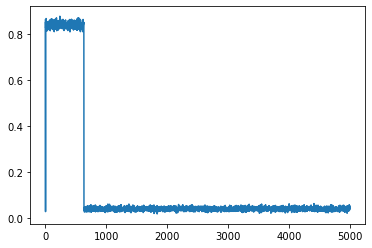

In [ ]:
plt.plot(ab['2diff']/ab['sumdiff'])

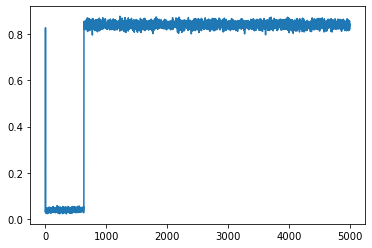

In [ ]:
plt.plot(ab['3diff']/ab['sumdiff'])